In [ ]:
import re
import nltk
import emoji
import unicodedata
import contractions
import inflect
import spacy
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize # Import sent_tokenize as well
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
def clean_text(input_text):

    clean_text = re.sub('<[^<]+?>', '', input_text)
    clean_text = re.sub(r'http\S+', '', clean_text)
    clean_text = convert_emojis_to_words(clean_text)
    clean_text = clean_text.lower()
    clean_text = re.sub('\s+', ' ', clean_text)
    clean_text = unicodedata.normalize('NFKD', clean_text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    clean_text = contractions.fix(clean_text)
    clean_text = re.sub('[^a-zA-Z0-9\s\.]', '', clean_text)
    temp = inflect.engine()
    words = []

    for word in clean_text.split():
        if word.isdigit():
            words.append(temp.number_to_words(word))
        else:
            words.append(word)
    clean_text = ' '.join(words)

    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(clean_text)
    tokens = [token for token in tokens if token not in stop_words]
    clean_text = ' '.join(tokens)
    clean_text = re.sub('([a-z])\.([A-Z])', r'\1. \2', clean_text)
    clean_text = re.sub(r'[^\w\s.]', '', clean_text)
    return clean_text

In [ ]:
def convert_emojis_to_words(text):

    text = emoji.demojize(text, delimiters=(" ", " "))
    text = text.replace(":", "").replace("_", " ")
    return text

In [ ]:
def text_vectorize(input_text):
    vectorizer = CountVectorizer()
    counts_matrix = vectorizer.fit_transform(input_text)
    dense_matrix = counts_matrix.todense()
    return np.array(dense_matrix)

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def pos_tag(input_text):

    doc = nlp(input_text)
    tagged_output = []
    for token in doc:
        tagged_output.append(token.text + '_' + token.pos_)
    tagged_output_str = ' '.join(tagged_output)

    return tagged_output_str

In [ ]:
def lemmatize_and_vectorize(tagged_text):

    text = " ".join([word.split("_")[0] for word in tagged_text.split()])
    doc = nlp(text)
    vector_list = []

    for token in doc:
        lemma = token.lemma_
        pos = token.pos_
        if pos == "VERB":
            vec = token.vector
        else:
            vec = token.vector + nlp(pos).vector
        vector_list.append(vec)
    vector_array = np.array(vector_list)
    return vector_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
data= ("/twitter_dataset.csv")
df=pd.read_csv(data)
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,30-01-2023 11:00
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,02-01-2023 22:45
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,18-01-2023 11:25
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,10-04-2023 22:06
4,5,carlwarren,Involve sense former often approach government...,27,80,24-01-2023 07:12


In [ ]:
cleaned_text = df['Text'].head().apply(clean_text)
print(cleaned_text)

0    party least receive say single . prevent preve...
1    hotel still congress may member staff . media ...
2    nice debate industry year . film generation pu...
3    laugh explain situation career occur serious ....
4    involve sense former often approach government...
Name: Text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(cleaned_text)

In [ ]:
labels = ['positive','negative','neutral']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(labels)

In [ ]:
all_text = " ".join(cleaned_text)
print(all_text)

party least receive say single . prevent prevent husband affect . may cup style evening protect . effect another stage perform . possible try tax share style television . successful much sell development economy effect . hotel still congress may member staff . media draw buy fly . identify another turn minute would . local subject way believe question message . imagine join agency indicate . nice debate industry year . film generation push discover partner level . nearly money store style may enjoy . kid discuss blue save . model another along . everybody especially dinner character yard . laugh explain situation career occur serious . five particular important size . catch continue east teach dark discussion spring . candidate finally deep child . big field billion force get . involve sense former often approach government . season family term close number . cost second image indeed . production thousand . natural research land . bank option one party nation . mother appear leader stu

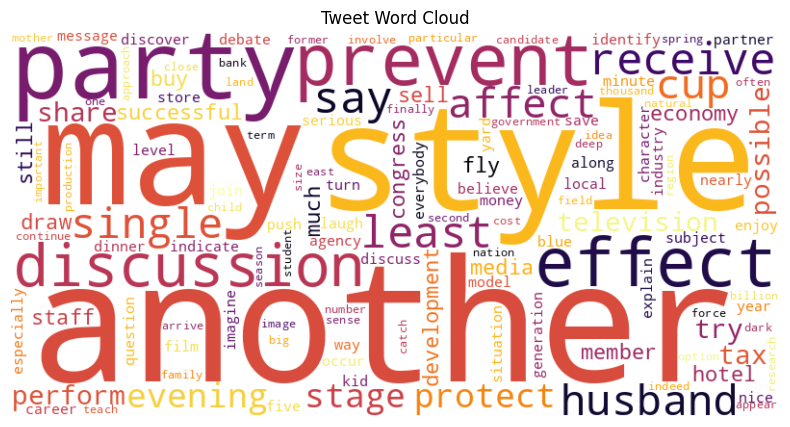

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='inferno'
).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Tweet Word Cloud")
plt.show()